In [68]:
from IPython.display import HTML, display
display(HTML("<table align=True ><tr><img src='Cereals.jfif' width=500 height=400></tr></table>"))

 <h1><b>Description of the data</b></h1>
    
The data consists oft two datasets. The first one cereals.csv consists of 78 different cereals.
For each of these cereals  the dataset gives the following informations:\\
Name: Name of cereal\n
mfr: Manufacturer of cereal
    A = American Home Food Products
    G = General Mills
    K = Kelloggs
    N = Nabisco
    P = Post
    Q = Quaker Oats
    R = Ralston Purina \\
type:
    cold
    hot \\
calories: calories per serving
protein: grams of protein
fat: grams of fat
sodium: milligrams of sodium
fiber: grams of dietary fiber
carbo: grams of complex carbohydrates
sugars: grams of sugars
potass: milligrams of potassium
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
shelf: display shelf (1, 2, or 3, counting from the floor)
weight: weight in ounces of one serving (1 unze (ounce) = 28,3495 g
cups: number of cups in one serving
rating: a rating of the cereals (from an expert)\\
                                         
The second dataset gives the top10 sold cereals in the market.\\

<b><u>Problem:</u> </b> a new company named <b>Knabberflocke</b>  wants to enter in the market and need to know the ingredients they should use to make their cereals.
    Frühstücksflocken



In [ ]:
# Explorative Datenanalyse (EDA)
## Benötigte Module importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [34]:
df1 = pd.read_csv('../Data/cereal.csv')
df2 = pd.read_csv('../Data/top10.csv')# Hier sind die Top 10  nach Verfaufszahle

In [3]:
df1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df2.head()

,name,platzierung
0,Honey Nut Cheerios,1
1,Frosted Flakes,2
2,Honey Bunch of Oats,3
3,Cheerios,4
4,Cinnamon Toast Crunch,5


#### There are no missing values in the dataset

In [32]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
name             77 non-null object
mfr              77 non-null object
type             77 non-null object
calories         77 non-null float64
protein          77 non-null float64
fat              77 non-null float64
sodium           77 non-null float64
fiber            77 non-null float64
carbo            77 non-null float64
sugars           77 non-null float64
potass           77 non-null float64
vitamins         77 non-null float64
shelf            77 non-null int64
weight           77 non-null float64
cups             77 non-null float64
rating           77 non-null float64
rating_classe    77 non-null category
dtypes: category(1), float64(12), int64(1), object(3)
memory usage: 10.0+ KB


In [35]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
name            10 non-null object
 platzierung    10 non-null int64
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


## Zusammenfassung des Datasets

In [7]:
 df1.describe()   


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


## Dataset cleaning


#### There are no missing values in our datasets 

In [37]:
df1.isnull().any(axis=0)

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

#### i delete the space at the beginning of the variable ' platzierung' by renaming the variable
#####  'Frosted Mini Wheats' is also differently written in cereals 'Frosted Mini-Wheats'. I also rename this cereals in sf2


In [47]:
df2.columns=['name','platzierung']
df2.replace(to_replace='Frosted Mini Wheats', value='Frosted Mini-Wheats', inplace=True)
df2

,name,platzierung
0,Honey Nut Cheerios,1
1,Frosted Flakes,2
2,Honey Bunch of Oats,3
3,Cheerios,4
4,Cinnamon Toast Crunch,5
5,Special K,6
6,Frosted Mini-Wheats,7
7,Lucky Charms,8
8,Froot Loops,9
9,Raisin Bran,10


### Feature engineering

<p> I create a new categorical variable rating_classe by dividing the variable rating into 4 classes
 Sodium and potass are expressed in mg and weight is expressed in ounce .
I convert all these values in g. (1 ounce = 28,3495 g). 
since the composition are given per serving and the weights of serving vary from one cereal to another
I will uniformise the ingredients so that the all represent the quantities for a serving of 100 g

In [48]:
df1['rating_classe']=pd.qcut(df1['rating'],q=4, precision=2,labels=['[18.03-33.17]',']33.17-40.4]',']40.4-50.83]',']50,83-93.7]'])

In [49]:
df1['sodium']=np.round(df1['sodium']/1000,decimals =3)
df1['potass']=np.round(df1['potass']/1000,decimals =3)
df1['weight']=np.round(df1['weight']*28.3495,decimals =2)

In [50]:
df1['calories']=np.round((df1['calories']*100/df1['weight']), decimals =2)
df1['protein']=np.round((df1['protein']*100/df1['weight']), decimals =2)
df1['fat']=np.round((df1['fat']*100/df1['weight']), decimals =2)
df1['sodium']=np.round((df1['sodium']*100/df1['weight']), decimals =2)
df1['fiber']=np.round((df1['fiber']*100/df1['weight']), decimals =2)
df1['carbo']=np.round((df1['carbo']*100/df1['weight']), decimals =2)
df1['sugars']=np.round((df1['sugars']*100/df1['weight']), decimals =2)
df1['potass']=np.round((df1['potass']*100/df1['weight']), decimals =2)
df1['vitamins']=np.round((df1['vitamins']*100/df1['weight']), decimals =2)


In [51]:
df1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_classe
0,100% Bran,N,C,246.91,14.11,3.53,0.46,35.27,17.64,21.16,0.99,88.18,3,28.35,0.33,68.402973,"]50,83-93.7]"
1,100% Natural Bran,Q,C,423.28,10.58,17.64,0.05,7.05,28.22,28.22,0.48,0.00,3,28.35,1.00,33.983679,]33.17-40.4]
2,All-Bran,K,C,246.91,14.11,3.53,0.92,31.75,24.69,17.64,1.13,88.18,3,28.35,0.33,59.425505,"]50,83-93.7]"
3,All-Bran with Extra Fiber,K,C,176.37,14.11,0.00,0.49,49.38,28.22,0.00,1.16,88.18,3,28.35,0.50,93.704912,"]50,83-93.7]"
4,Almond Delight,R,C,388.01,7.05,7.05,0.71,3.53,49.38,28.22,-0.00,88.18,3,28.35,0.75,34.384843,]33.17-40.4]


<p> I add columns to the top10 dataset in order to make analyses to identify what characterize 
the cereals which are most saled</p>

In [52]:
df2=pd.merge(df2,df1,on='name',how='left')

<p> We see that 'Honey Bunch of Oats' does not exist in the cereals dataset </p>

In [53]:
df2


,name,platzierung,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_classe
0,Honey Nut Cheerios,1,G,C,388.01,10.58,3.53,0.88,5.29,40.56,35.27,0.32,88.18,1.0,28.35,0.75,31.072217,[18.03-33.17]
1,Frosted Flakes,2,K,C,388.01,3.53,0.00,0.71,3.53,49.38,38.80,0.09,88.18,1.0,28.35,0.75,31.435973,[18.03-33.17]
2,Honey Bunch of Oats,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cheerios,4,G,C,388.01,21.16,7.05,1.02,7.05,59.96,3.53,0.37,88.18,1.0,28.35,1.25,50.764999,]40.4-50.83]
4,Cinnamon Toast Crunch,5,G,C,423.28,3.53,10.58,0.74,0.00,45.86,31.75,0.16,88.18,2.0,28.35,0.75,19.823573,[18.03-33.17]
5,Special K,6,K,C,388.01,21.16,0.00,0.81,3.53,56.44,10.58,0.19,88.18,1.0,28.35,1.00,53.131324,"]50,83-93.7]"
6,Frosted Mini-Wheats,7,K,C,352.73,10.58,0.00,0.00,10.58,49.38,24.69,0.35,88.18,2.0,28.35,0.80,58.345141,"]50,83-93.7]"
7,Lucky Charms,8,G,C,388.01,7.05,3.53,0.63,0.00,42.33,42.33,0.19,88.18,2.0,28.35,1.00,26.734515,[18.03-33.17]
8,Froot Loops,9,K,C,388.01,7.05,3.53,0.44,3.53,38.80,45.86,0.11,88.18,2.0,28.35,1.00,32.207582,[18.03-33.17]
9,Raisin Bran,10,K,C,318.30,7.96,2.65,0.56,13.26,37.14,31.83,0.64,66.31,2.0,37.70,0.75,39.259197,]33.17-40.4]


## Graphical  Analyses
### Histogrammes of numerical variables

<Figure size 432x288 with 0 Axes>

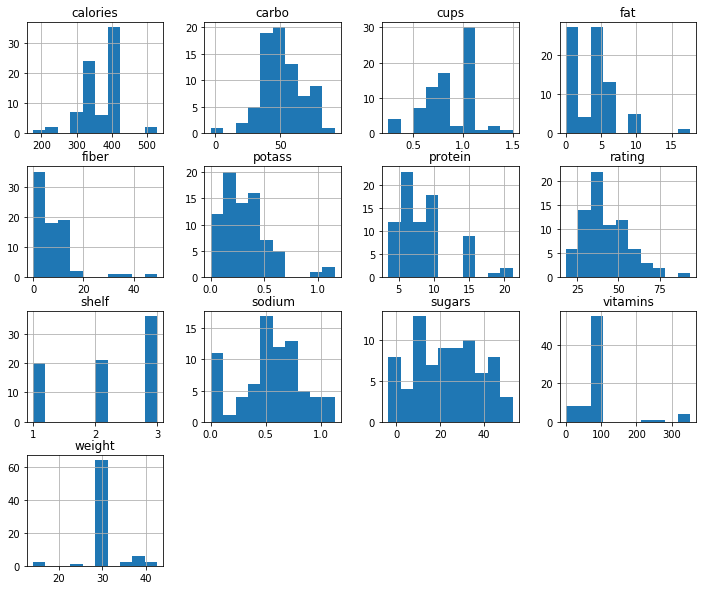

In [20]:
fig=plt.figure();
df1.hist(figsize=(12,10));
fig.savefig('../Figures/Histo.png')

### Visualizations of the variables

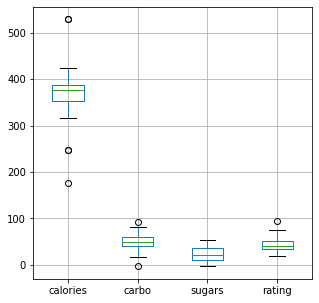

In [23]:
fig=plt.figure(figsize=(5,5));
(df1[['calories','carbo','sugars', 'rating']]).boxplot();
fig.savefig('../Figures/Boxplots1.png')

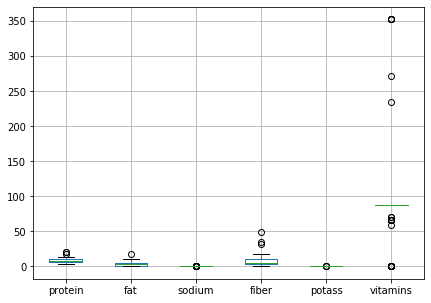

In [25]:
fig=plt.figure(figsize=(7,5));
(df1[['protein','fat','sodium','fiber','potass','vitamins']]).boxplot()
fig.savefig('../Figures/Boxplots2.png')

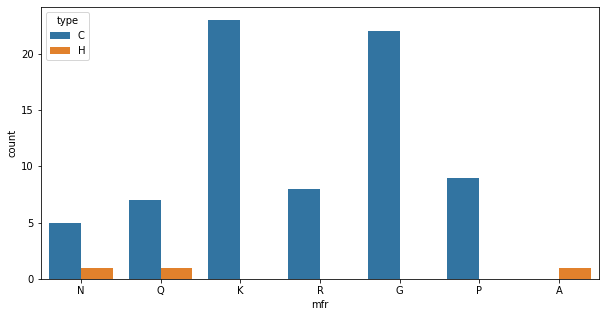

In [172]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='mfr',hue='type',  data=df1);
fig.savefig('../Figures/barplot_manufacturers.png')

#### In the whole cereals just three are of type hot cereals. Therefore there is not really significant to differentiate analyses along
####    this item. Almost all the manufacturers offer several qualities of cereals. only N and A just produce cereals of best quality

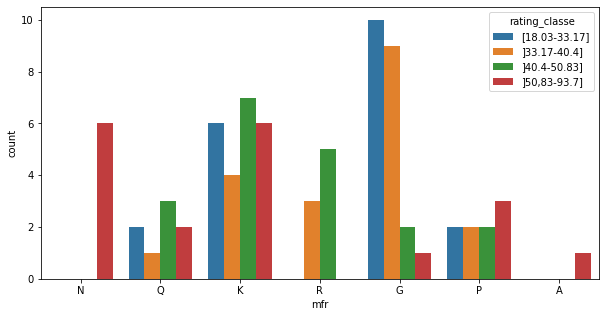

In [43]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='mfr',hue='rating_classe',  data=df1);
fig.savefig('../Figures/barplot_rating1.png')


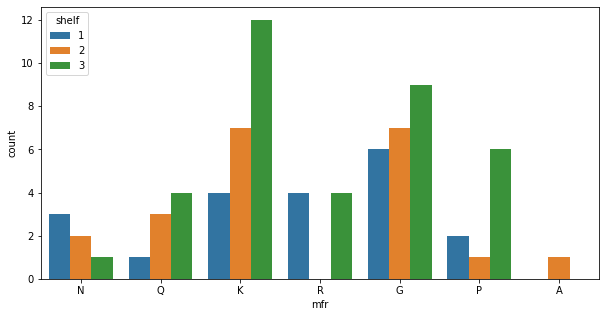

In [27]:
#  How are the products of the differents manufacturers  positioned in the shelves

fig=plt.figure(figsize=(10,5))
sns.countplot(x='mfr',hue='shelf',  data=df1);
fig.savefig('../Figures/barplot_manufacturers2.png')



#### Factor plots in the whole cereals database

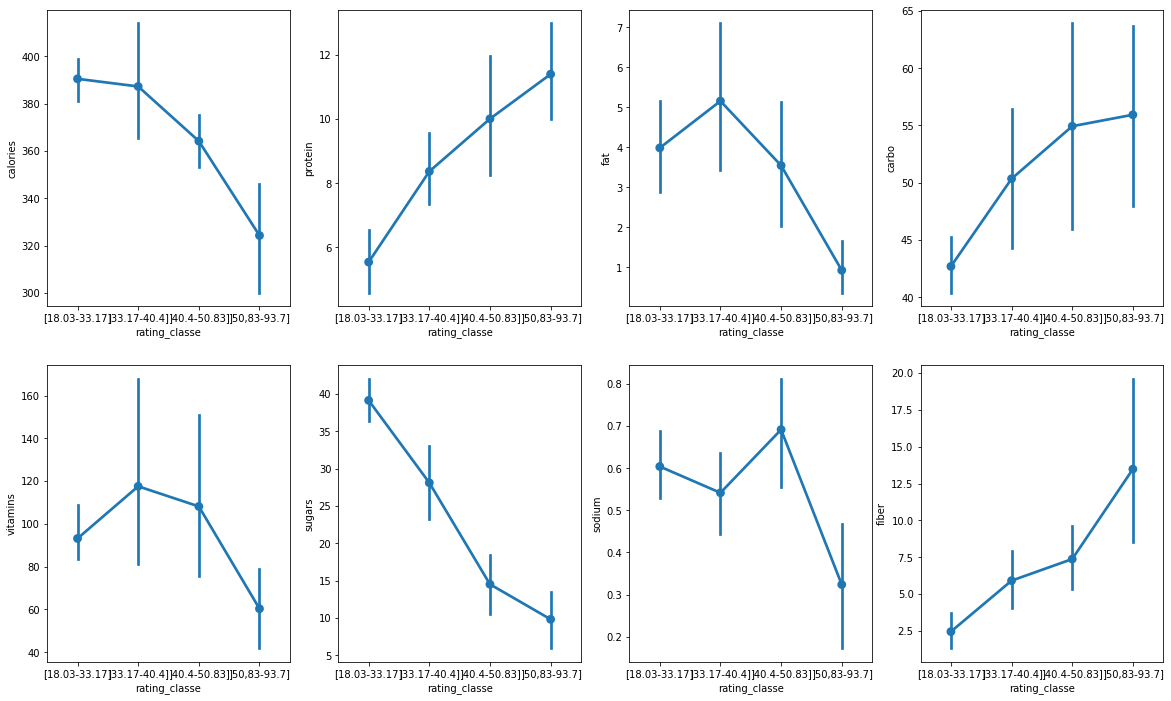

In [23]:

f, axes = plt.subplots(2,4, figsize=(20, 12))
sns.factorplot(x='rating_classe',y='calories',data=df1,ax=axes[0,0]);
sns.factorplot(x='rating_classe',y='protein',data=df1, ax=axes[0,1])
sns.factorplot(x='rating_classe',y='fat',data=df1, ax=axes[0,2])
sns.factorplot(x='rating_classe',y='carbo',data=df1, ax=axes[0,3])
sns.factorplot(x='rating_classe',y='vitamins',data=df1,ax=axes[1,0] )
sns.factorplot(x='rating_classe',y='sugars',data=df1, ax=axes[1,1])
sns.factorplot(x='rating_classe',y='sodium',data=df1,ax=axes[1,2])
sns.factorplot(x='rating_classe',y='fiber',data=df1,ax=axes[1,3])
for i in range(2,10):
    plt.close(i)

In [9]:
sns.factorplot?

#### Factor plots in the top 10 sellers

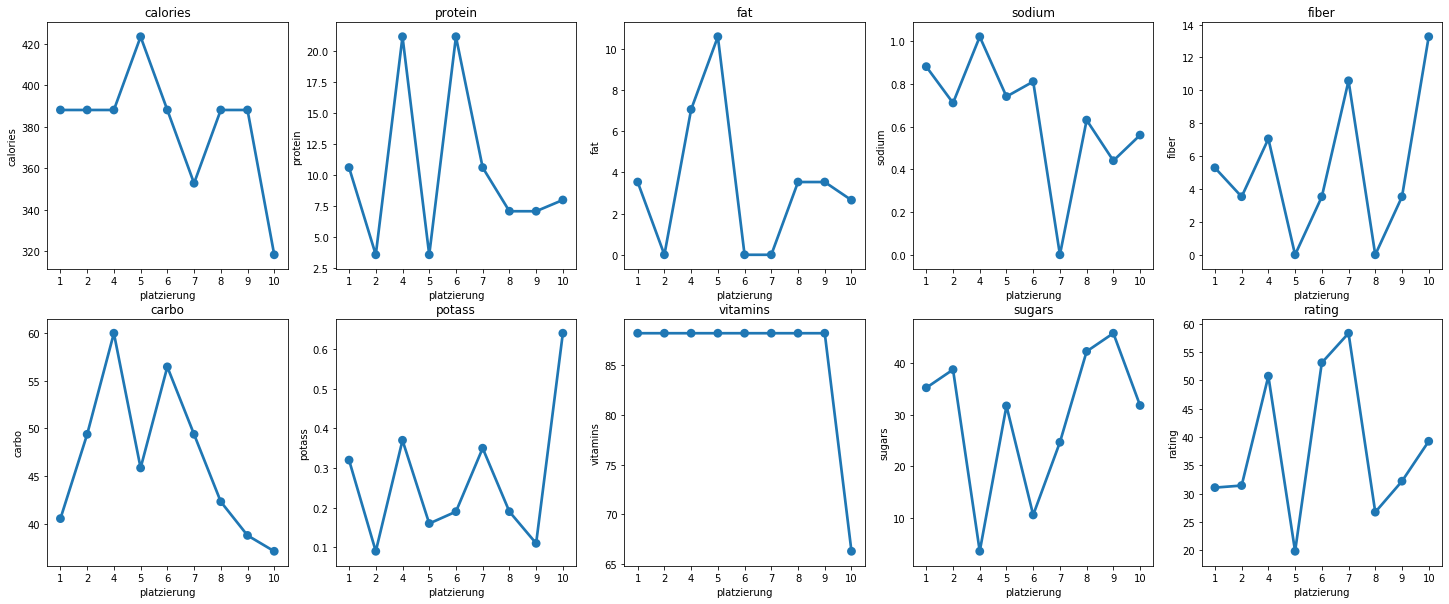

In [16]:
stoffe=['calories','protein','fat','sodium','fiber','carbo','potass','vitamins','sugars','rating']

n_rows=2
n_cols=5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r,c] #Show where to position each subplot
        sns.factorplot(x='platzierung',y=stoffe[i], ax=ax,data=df2.dropna())
        ax.set_title(stoffe[i])
     
        
#plt.tight_layout()   #tight_layout
for i in range(2,12):
    plt.close(i)
plt.show()

#### Factor plots show that the more sugars, calories or fat a cereal contains the worse the rating. The more proteins, fiber
#### and carbo a cereal contain the better the rating

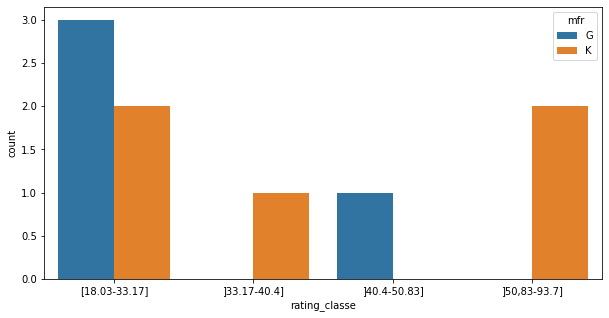

In [45]:
# How are the top10 sellers rated
fig=plt.figure(figsize=(10,5))
sns.countplot(hue='mfr',x='rating_classe',  data=df2);
fig.savefig('../Figures/barplot_rating2.png')

## Überblick über gruppierte Werte
### Aggregationen

From the graph above we see that there are just 3  cereals of type hot
Therefore there is not too much observation we gain if we group by this variable
agg1 is done on the dataset cereals and agg2 is done on the top 10

In [56]:

agg1_mfr=df1.groupby(['mfr']).agg({'calories':np.mean,'protein':np.mean,'fat':np.mean,'sodium':np.mean,
                                         'fiber':np.mean,'carbo':np.mean,'potass':np.mean,'vitamins':np.mean,
                                   'sugars':np.mean, 'rating':np.mean})
agg1_mfs=df1.groupby(['mfr','shelf']).agg({'calories':np.mean,'protein':np.mean,'fat':np.mean,'sodium':np.mean,
                                         'fiber':np.mean,'carbo':np.mean,'potass':np.mean,'vitamins':np.mean,
                                   'sugars':np.mean, 'rating':np.mean})

agg1_rating=df1.groupby(['rating_classe']).agg({'calories':np.mean,'protein':np.mean,'fat':np.mean,'sodium':np.mean,
                                         'fiber':np.mean,'carbo':np.mean,'potass':np.mean,'vitamins':np.mean, 'sugars':np.mean})

agg2_mfr=(df2.dropna()).groupby(['mfr']).agg({'calories':np.mean,'protein':np.mean,'fat':np.mean,'sodium':np.mean,
                                         'fiber':np.mean,'carbo':np.mean,'potass':np.mean,'vitamins':np.mean,'sugars':np.mean,
                                  'rating':np.mean})
agg2_mfs=(df2.dropna()).groupby(['mfr','shelf']).agg({'calories':np.mean,'protein':np.mean,'fat':np.mean,'sodium':np.mean,
                                         'fiber':np.mean,'carbo':np.mean,'potass':np.mean,'vitamins':np.mean,
                                   'sugars':np.mean, 'rating':np.mean})

agg2_rating=(df2.dropna()).groupby(['rating_classe']).agg({'calories':np.mean,'protein':np.mean,'fat':np.mean,'sodium':np.mean,
                                         'fiber':np.mean,'carbo':np.mean,'potass':np.mean,'vitamins':np.mean,'sugars':np.mean})

agg2_rs=(df2.dropna()).groupby(['rating_classe','shelf']).agg({'calories':np.mean,'protein':np.mean,'fat':np.mean,'sodium':np.mean,
                                         'fiber':np.mean,'carbo':np.mean,'potass':np.mean,'vitamins':np.mean,
                                   'sugars':np.mean, 'rating':np.mean})
                                    



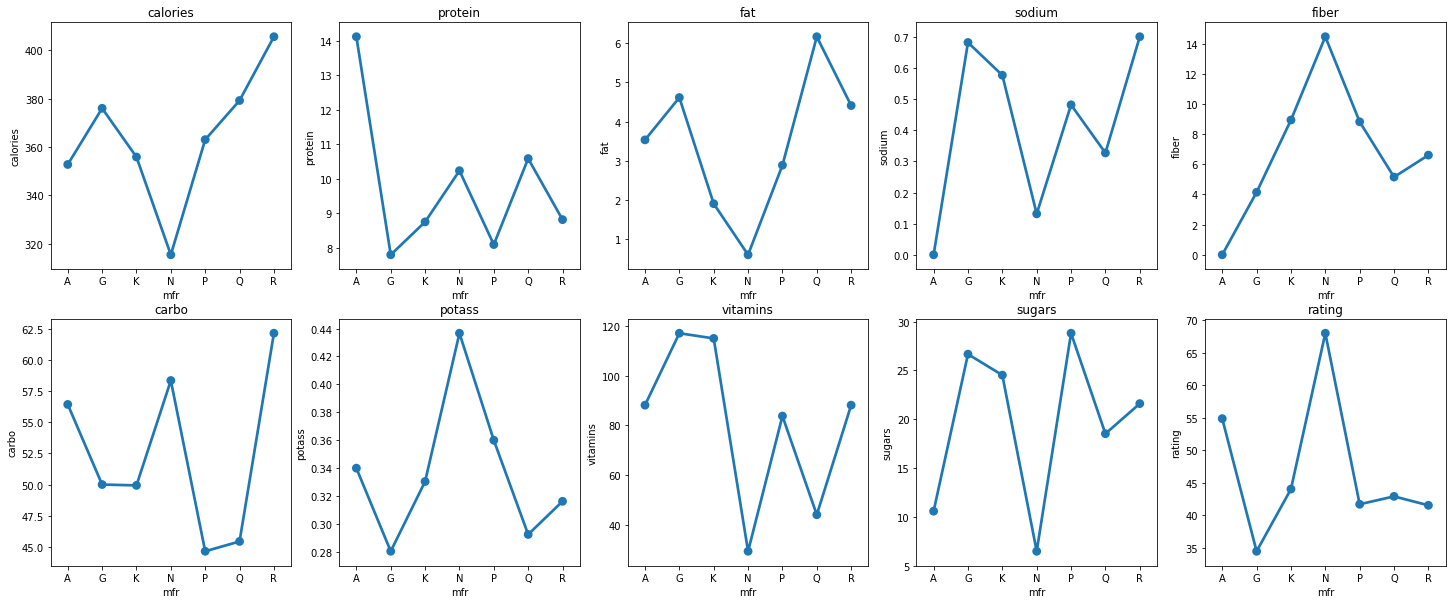

In [64]:
agg1_mfr.reset_index (inplace =True)
stoffe=['calories','protein','fat','sodium','fiber','carbo','potass','vitamins','sugars','rating']

n_rows=2
n_cols=5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r,c] #Show where to position each subplot
        sns.factorplot(x='mfr',y=stoffe[i], ax=ax,data=agg1_mfr)
        ax.set_title(stoffe[i])
      
        
#plt.tight_layout()   #tight_layout
for i in range(2,12):
    plt.close(i)
plt.show()

In [30]:
agg1_mfs

calories    protein       fat    sodium      fiber      carbo  \
mfr shelf                                                                    
A   2      352.730000  14.110000  3.530000  0.000000   0.000000  56.440000   
G   1      376.250000  10.578333  4.703333  0.788333   6.465000  51.145000   
    2      393.048571   4.535714  4.537143  0.718571   0.000000  49.384286   
    3      362.570000   8.486667  4.613333  0.584444   5.827778  49.711111   
K   1      379.190000   9.697500  0.000000  0.890000   2.647500  64.372500   
    2      378.050000   7.181429  1.891429  0.382857   5.422857  42.091429   
    3      335.068333   9.352500  2.530000  0.586667  13.097500  49.687500   
N   1      324.970000   9.886667  0.000000  0.000000  12.480000  68.523333   
    2      335.095000   8.815000  0.000000  0.165000   7.055000  63.490000   
    3      246.910000  14.110000  3.530000  0.460000  35.270000  17.640000   
P   1      370.370000   5.290000  0.000000  0.395000   0.000000  44.090000   
    2      388.010000   3.530000  3.530000  0.480000   0.000000  45.860000   
    3      356.396667   9.791667  3.733333  0.511667  13.235000  44.605000   
Q   1      352.730000  17.640000  7.050000  0.000000   9.520000  -3.530000   
    2      399.763333   7.056667  7.050000  0.696667   3.526667  42.330000   
    3      370.432500  11.465000  5.292500  0.132500   5.290000  59.977500   
R   1      361.552500   7.052500  1.765000  0.840000   6.172500  67.900000   
    3      449.735000  10.580000  7.052500  0.562500   7.055000  56.437500   

             potass    vitamins     sugars     rating  
mfr shelf                                              
A   2      0.340000   88.180000  10.580000  54.850917  
G   1      0.310000   88.180000  22.338333  39.872079  
    2      0.165714   88.180000  35.780000  26.069929  
    3      0.350000  158.912222  22.476667  37.440751  
K   1      0.130000   88.180000  16.752500  42.747695  
    2      0.222857   85.055714  39.821429  37.131878  
    3      0.460000  141.444167  18.187500  48.497559  
N   1      0.436667    0.000000   0.000000  71.836874  
    2      0.160000   44.090000   8.820000  61.948905  
    3      0.990000   88.180000  21.160000  68.402973  
P   1      0.130000   88.180000  45.855000  31.997429  
    2      0.090000   88.180000  42.330000  28.025765  
    3      0.481667   81.595000  20.888333  47.221846  
Q   1      0.390000    0.000000  -3.530000  50.828392  
    2      0.206667   88.180000  34.096667  28.414072  
    3      0.332500   22.045000  12.345000  51.814327  
R   1      0.262500   88.180000  12.342500  45.587913  
    3      0.370000   88.180000  30.865000  37.498082

In [31]:
agg1_rating

,calories,protein,fat,sodium,fiber,carbo,potass,vitamins,sugars
rating_classe,,,,,,,,,
[18.03-33.17],390.481000,5.538500,3.986000,0.604000,2.446500,42.705500,0.196500,93.179000,39.155000
]33.17-40.4],387.254211,8.366316,5.156842,0.541579,5.906316,50.352632,0.328421,117.574737,28.123684
]40.4-50.83],364.152105,10.007368,3.546316,0.691579,7.372632,54.936316,0.317368,108.155789,14.532632
"]50,83-93.7]",324.227895,11.399474,0.928947,0.323684,13.480526,55.934737,0.454737,60.333684,9.838947


#### Specificities of the top10 salers

In [32]:
df2.dropna().mean()

platzierung      5.777778
calories       380.263333
protein         10.288889
fat              3.430000
sodium           0.643333
fiber            5.196667
carbo           46.650000
sugars          29.404444
potass           0.268889
vitamins        85.750000
shelf            1.555556
weight          29.388889
cups             0.894444
rating          38.086058
dtype: float64

In [33]:
agg2_mfr

,calories,protein,fat,sodium,fiber,carbo,potass,vitamins,sugars,rating
mfr,,,,,,,,,,
G,396.8275,10.580,6.1725,0.8175,3.085,47.1775,0.260,88.180,28.220,32.098826
K,367.0120,10.056,1.2360,0.5040,6.886,46.2280,0.276,83.806,30.352,42.875843


In [34]:
agg2_mfs

calories  protein    fat    sodium     fiber      carbo  \
mfr shelf                                                              
G   1.0    388.010000   15.870  5.290  0.950000  6.170000  50.260000   
    2.0    405.645000    5.290  7.055  0.685000  0.000000  44.095000   
K   1.0    388.010000   12.345  0.000  0.760000  3.530000  52.910000   
    2.0    353.013333    8.530  2.060  0.333333  9.123333  41.773333   

             potass  vitamins     sugars     rating  
mfr shelf                                            
G   1.0    0.345000     88.18  19.400000  40.918608  
    2.0    0.175000     88.18  37.040000  23.279044  
K   1.0    0.140000     88.18  24.690000  42.283648  
    2.0    0.366667     80.89  34.126667  43.270640

In [35]:
agg2_rating

,calories,protein,fat,sodium,fiber,carbo,potass,vitamins,sugars
rating_classe,,,,,,,,,
[18.03-33.17],395.064,6.348,4.234,0.680,2.470,43.386,0.174,88.18,38.802
]33.17-40.4],318.300,7.960,2.650,0.560,13.260,37.140,0.640,66.31,31.830
]40.4-50.83],388.010,21.160,7.050,1.020,7.050,59.960,0.370,88.18,3.530
"]50,83-93.7]",370.370,15.870,0.000,0.405,7.055,52.910,0.270,88.18,17.635


In [41]:
agg2_rs

calories    protein    fat    sodium      fiber  carbo  \
rating_classe shelf                                                             
[18.03-33.17] 1.0    388.010000   7.055000  1.765  0.795000   4.410000  44.97   
              2.0    399.766667   5.876667  5.880  0.603333   1.176667  42.33   
]33.17-40.4]  1.0           NaN        NaN    NaN       NaN        NaN    NaN   
              2.0    318.300000   7.960000  2.650  0.560000  13.260000  37.14   
]40.4-50.83]  1.0    388.010000  21.160000  7.050  1.020000   7.050000  59.96   
              2.0           NaN        NaN    NaN       NaN        NaN    NaN   
]50,83-93.7]  1.0    388.010000  21.160000  0.000  0.810000   3.530000  56.44   
              2.0    352.730000  10.580000  0.000  0.000000  10.580000  49.38   

                       potass  vitamins  sugars     rating  
rating_classe shelf                                         
[18.03-33.17] 1.0    0.205000     88.18  37.035  31.254095  
              2.0    0.153333     88.18  39.980  26.255223  
]33.17-40.4]  1.0         NaN       NaN     NaN        NaN  
              2.0    0.640000     66.31  31.830  39.259197  
]40.4-50.83]  1.0    0.370000     88.18   3.530  50.764999  
              2.0         NaN       NaN     NaN        NaN  
]50,83-93.7]  1.0    0.190000     88.18  10.580  53.131324  
              2.0    0.350000     88.18  24.690  58.345141

In [46]:
df2.loc[df2['rating_classe']==']50,83-93.7]']

,name,platzierung,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_classe
5,Special K,6,K,C,388.01,21.16,0.0,0.81,3.53,56.44,10.58,0.19,88.18,1.0,28.35,1.0,53.131324,"]50,83-93.7]"
6,Frosted Mini-Wheats,7,K,C,352.73,10.58,0.0,0.00,10.58,49.38,24.69,0.35,88.18,2.0,28.35,0.8,58.345141,"]50,83-93.7]"


## Correlations

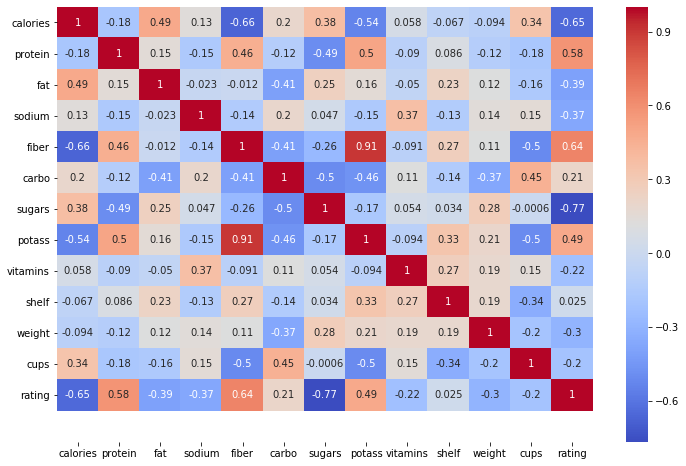

In [37]:
fig=plt.figure(figsize=(12,8))
ax=sns.heatmap(df1.corr(),cmap='coolwarm',annot=True);
ax.set_ylim(14,0)
fig.savefig('../Figures/correlations.png')

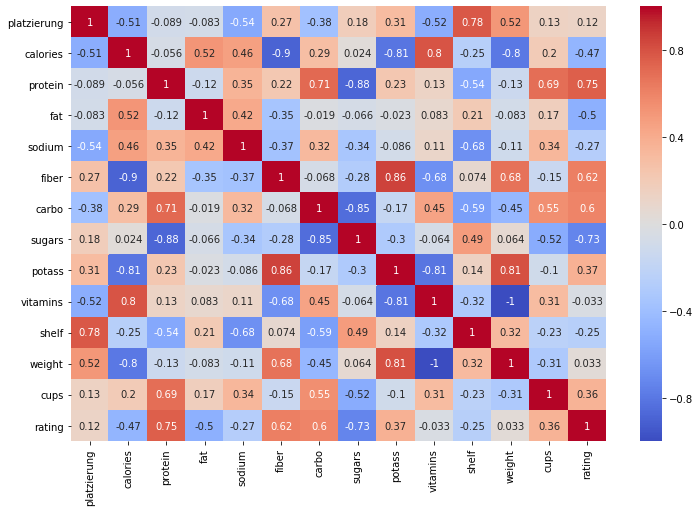

In [51]:
fig=plt.figure(figsize=(12,8))
ax=sns.heatmap(df2.corr(),cmap='coolwarm',annot=True);
ax.set_ylim(14,0)
fig.savefig('../Figures/correlations2.png')

## Summary of the explorative data analysis

<b> Summary </b>

• Negative correlations of the variable ,rating‘ with the variables  ‚calories‘, ‚fat‘ and ,‘sugar‘

• Relatively high positive correlations of the variable ,rating‘ with the variables  ‚protein‘, 'potass'  and ,‘fiber‘

• High correlation between 'potass'  and ,‘fiber‘

• the Top 10 cereals are only the products of the manufacturers G and K  

• Among the top ten sellers just 2 belong to the upper rated cereals. These are 'Frosted Mini-Wheats'
and 'Special K'  both from the manufacturer Kelloggs. That means their products are quite gut compare to the others

if the company Knabberflocke wants to be ensured to combine sales and good ratings of their product from experts
I recommend to combine characteristics of good rated products and good practices of the top10 products. 
Therefore my recommendations are expressed in form of intervals of value. </tbody>




<tr><td><b> Ingredient for 100g cereals</b></td><td><b>Average in the upper rated cereals</b></td> <td><b>Average in the Top10</b></td><td><b> average in the top10 best rated</b></td> <td><b>My recommendations</b></td></tr>
<tr><td> calorie</td> <td>324  </td> <td> 380</td><td> 370</td><td>[324-370] </td></tr>
<tr><td>Protein</td> <td>11.4</td> <td> 10.3</td><td> 15.9</td><td>[11.4-15.9] </td></tr>
<tr><td>Fat</td><td>0.9</td> <td> 3.43</td><td> 0</td><td>[0-0.9] </td></tr>
<tr><td>Sodium</td><td>0.32</td> <td>0.64 </td><td>0.41 </td><td>[0.32-0.41] </td></tr>
<tr><td>Fiber</td><td>13.5</td> <td>5.2 </td><td>7.1 </td><td>[7.1-13.5] </td></tr>
<tr><td>carbo</td><td>56</td> <td>46.6 </td><td>52.9 </td><td>[52.9-56] </td></tr>
<tr><td>sugars</td><td>9.8</td> <td>29.4 </td><td> 17.6</td><td>[9.8-17.6] </td></tr>
<tr><td>potass</td><td>0.45</td> <td> 0.27</td><td>0.27 </td><td>[0.27-0.45] </td></tr>
<tr><td>vitamins</td><td>60.33</td>  <td>85.75 </td><td>88.2</td><td>[60-88]</td></tr>



